In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('renttherunway.csv')

In [63]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [64]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192482 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192199 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [66]:
df.shape

(192544, 15)

#### There are 192544 total entries, 5 numerical features and 10 categorical features. There also seem to be missing values in multiple columns

In [67]:
df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [68]:
df.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [69]:
len(df[df.duplicated()])

189

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
len(df[df.duplicated()])

0

#### There were 189 duplicate records that were dropped from the table

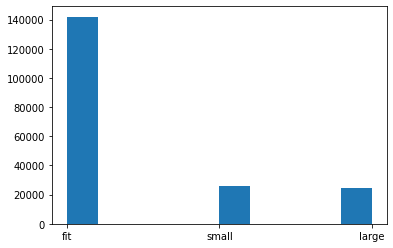

In [72]:
plt.hist(df["fit"])
plt.show()

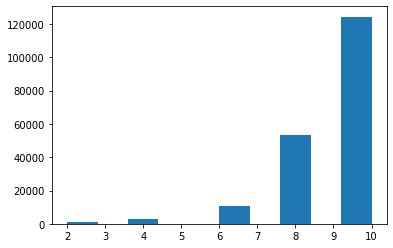

In [73]:
plt.hist(df["rating"])
plt.show()

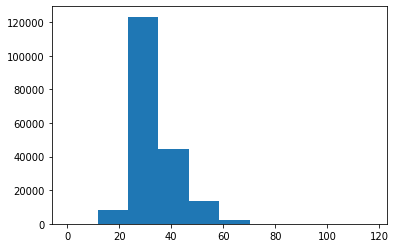

In [74]:
plt.hist(df["age"])
plt.show()

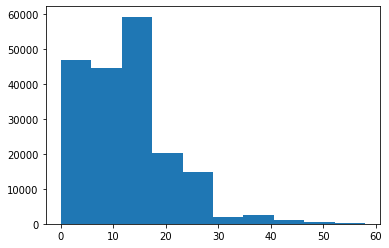

In [75]:
plt.hist(df["size"])
plt.show()

#### Majority of the fit feedback were 'fit' with lower frequency of large and small fits, and 9-10 rating was given to most of the rentals. Most of the customers were between 25-45 years of age and sizes mostly ranged from 0-15

In [76]:
#removing redundant part of string and converting to float
df["weight"] = df["weight"].str.replace('lbs', '')
df["weight"] = df["weight"].astype(float)

In [77]:
# changing height to inches
df["height"].fillna(value = "0' 0\"", inplace = True)
df["height"] = df["height"].str.replace('"', '')
df['height'] = [s.split("' ") for s in df['height'].astype(str)]
df['height_in'] = [list( map(int,i) ) for i in df['height']]
df['height_in'] = [float(h[0])*12 + float(h[1]) for h in df['height_in']]
df["height_in"] = df["height_in"].replace({0.0 : np.nan})

In [78]:
df["age"] = df["age"].replace({'0':np.nan, 0:np.nan, 0.0:np.nan}) #replacing invalid age value with NaN

In [79]:
df['rented for'].value_counts()

wedding            57737
formal affair      40380
party              35578
everyday           16810
other              15366
work               15029
date                7382
vacation            4062
party: cocktail        1
Name: rented for, dtype: int64

In [80]:
df["rented for"] = df["rented for"].str.replace('party: cocktail', 'party')   #replacing incorrect entry in rented for values
df['rented for'].value_counts()

wedding          57737
formal affair    40380
party            35579
everyday         16810
other            15366
work             15029
date              7382
vacation          4062
Name: rented for, dtype: int64

#### From unique value counts we can observe that most of the outfits were rented for weddings, then formal affairs and parties.

In [81]:
df.isnull().sum()

fit                   0
user_id               0
bust size         18392
item_id               0
weight            29955
rating               81
rented for           10
review_text          62
body type         14625
review_summary      345
category              0
height                0
size                  0
age                 984
review_date           0
height_in           675
dtype: int64

In [82]:
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_in
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"[5, 8]",14,28.0,"April 20, 2016",68.0
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"[5, 6]",12,36.0,"June 18, 2013",66.0
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"[5, 4]",4,116.0,"December 14, 2015",64.0
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"[5, 5]",8,34.0,"February 12, 2014",65.0
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"[5, 9]",12,27.0,"September 26, 2016",69.0


In [83]:
df.drop('height', axis=1, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192355 non-null  object 
 1   user_id         192355 non-null  int64  
 2   bust size       173963 non-null  object 
 3   item_id         192355 non-null  int64  
 4   weight          162400 non-null  float64
 5   rating          192274 non-null  float64
 6   rented for      192345 non-null  object 
 7   review_text     192293 non-null  object 
 8   body type       177730 non-null  object 
 9   review_summary  192010 non-null  object 
 10  category        192355 non-null  object 
 11  size            192355 non-null  int64  
 12  age             191371 non-null  float64
 13  review_date     192355 non-null  object 
 14  height_in       191680 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 23.5+ MB


In [85]:
#dropping columns redundant for analysis
df.drop('user_id', axis=1, inplace=True)
df.drop('item_id', axis=1, inplace=True)
df.drop('review_text', axis=1, inplace=True)
df.drop('review_summary', axis=1, inplace=True)
df.drop('review_date', axis=1, inplace=True)

In [86]:
#imputing missing values with appropriate stats
df['weight'] = df['weight'].fillna(df['weight'].median())
df['height_in'] = df['height_in'].fillna(df['height_in'].median())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['bust size'] = df['bust size'].fillna(df['bust size'].mode()[0])
df['rented for'] = df['rented for'].fillna(df['rented for'].mode()[0])
df['body type'] = df['body type'].fillna(df['body type'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())

In [87]:
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
size          0
age           0
height_in     0
dtype: int64

#### Null values were imputed

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192355 non-null  object 
 1   bust size   192355 non-null  object 
 2   weight      192355 non-null  float64
 3   rating      192355 non-null  float64
 4   rented for  192355 non-null  object 
 5   body type   192355 non-null  object 
 6   category    192355 non-null  object 
 7   size        192355 non-null  int64  
 8   age         192355 non-null  float64
 9   height_in   192355 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 16.1+ MB
None


#### Now there are total of 192355 with no null or duplicate values in dataset

In [89]:
df.describe()

,weight,rating,size,age,height_in
count,192355.000000,192355.000000,192355.000000,192355.000000,192355.000000
mean,137.019875,9.092709,12.245801,33.864625,65.309334
std,20.143567,1.429922,8.496299,8.030510,2.658946
min,50.000000,2.000000,0.000000,1.000000,54.000000
25%,125.000000,8.000000,8.000000,29.000000,63.000000
50%,135.000000,10.000000,12.000000,32.000000,65.000000
75%,145.000000,10.000000,16.000000,37.000000,67.000000
max,300.000000,10.000000,58.000000,117.000000,78.000000


In [90]:
df['age'].value_counts()

31.0     14503
32.0     14480
30.0     14128
29.0     13581
28.0     11954
         ...  
115.0        1
113.0        1
9.0          1
92.0         1
112.0        1
Name: age, Length: 88, dtype: int64

### We can observe the following from the statistical summary of numerical features:
#### Weight averages around 137 lbs, with a minimum of 50 lbs and maximum of 300 lbs
#### Most users have given high ratings as the mean is 9, and the lowest rating given is 2 whereas the highest is 10
#### Size averages around 12.2 and lowesr is size 0 while highest is size 58
#### The mean age of customers is 34 years but there seem to be outliers in the data as lowest age is 1 year and highest is 117 years
#### Mean height of customers is 65 inches, with 54 inches being the shortest and 78 inches being the tallest customer

In [91]:
df.describe(include='object')

,fit,bust size,rented for,body type,category
count,192355,192355,192355,192355,192355
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,141909,45647,57747,69915,92752


In [92]:
df['bust size'].value_counts()

34b    45647
34c    23117
34d    18013
36c    13502
32d    11188
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: bust size, Length: 106, dtype: int64

### We can observe the following from the statistical summary of categorical features:
#### There are 3 types of unique fits and 'fit' has the most frequency
#### There are 106 different bust sizes with 34b being the most common
#### The clothes were mostly rented for weddings out of 9 different occasions
####  Out of 7 different body types, hourglass is the most common
#### There are 68 different categories of clothes, out of which dresses are being bought most

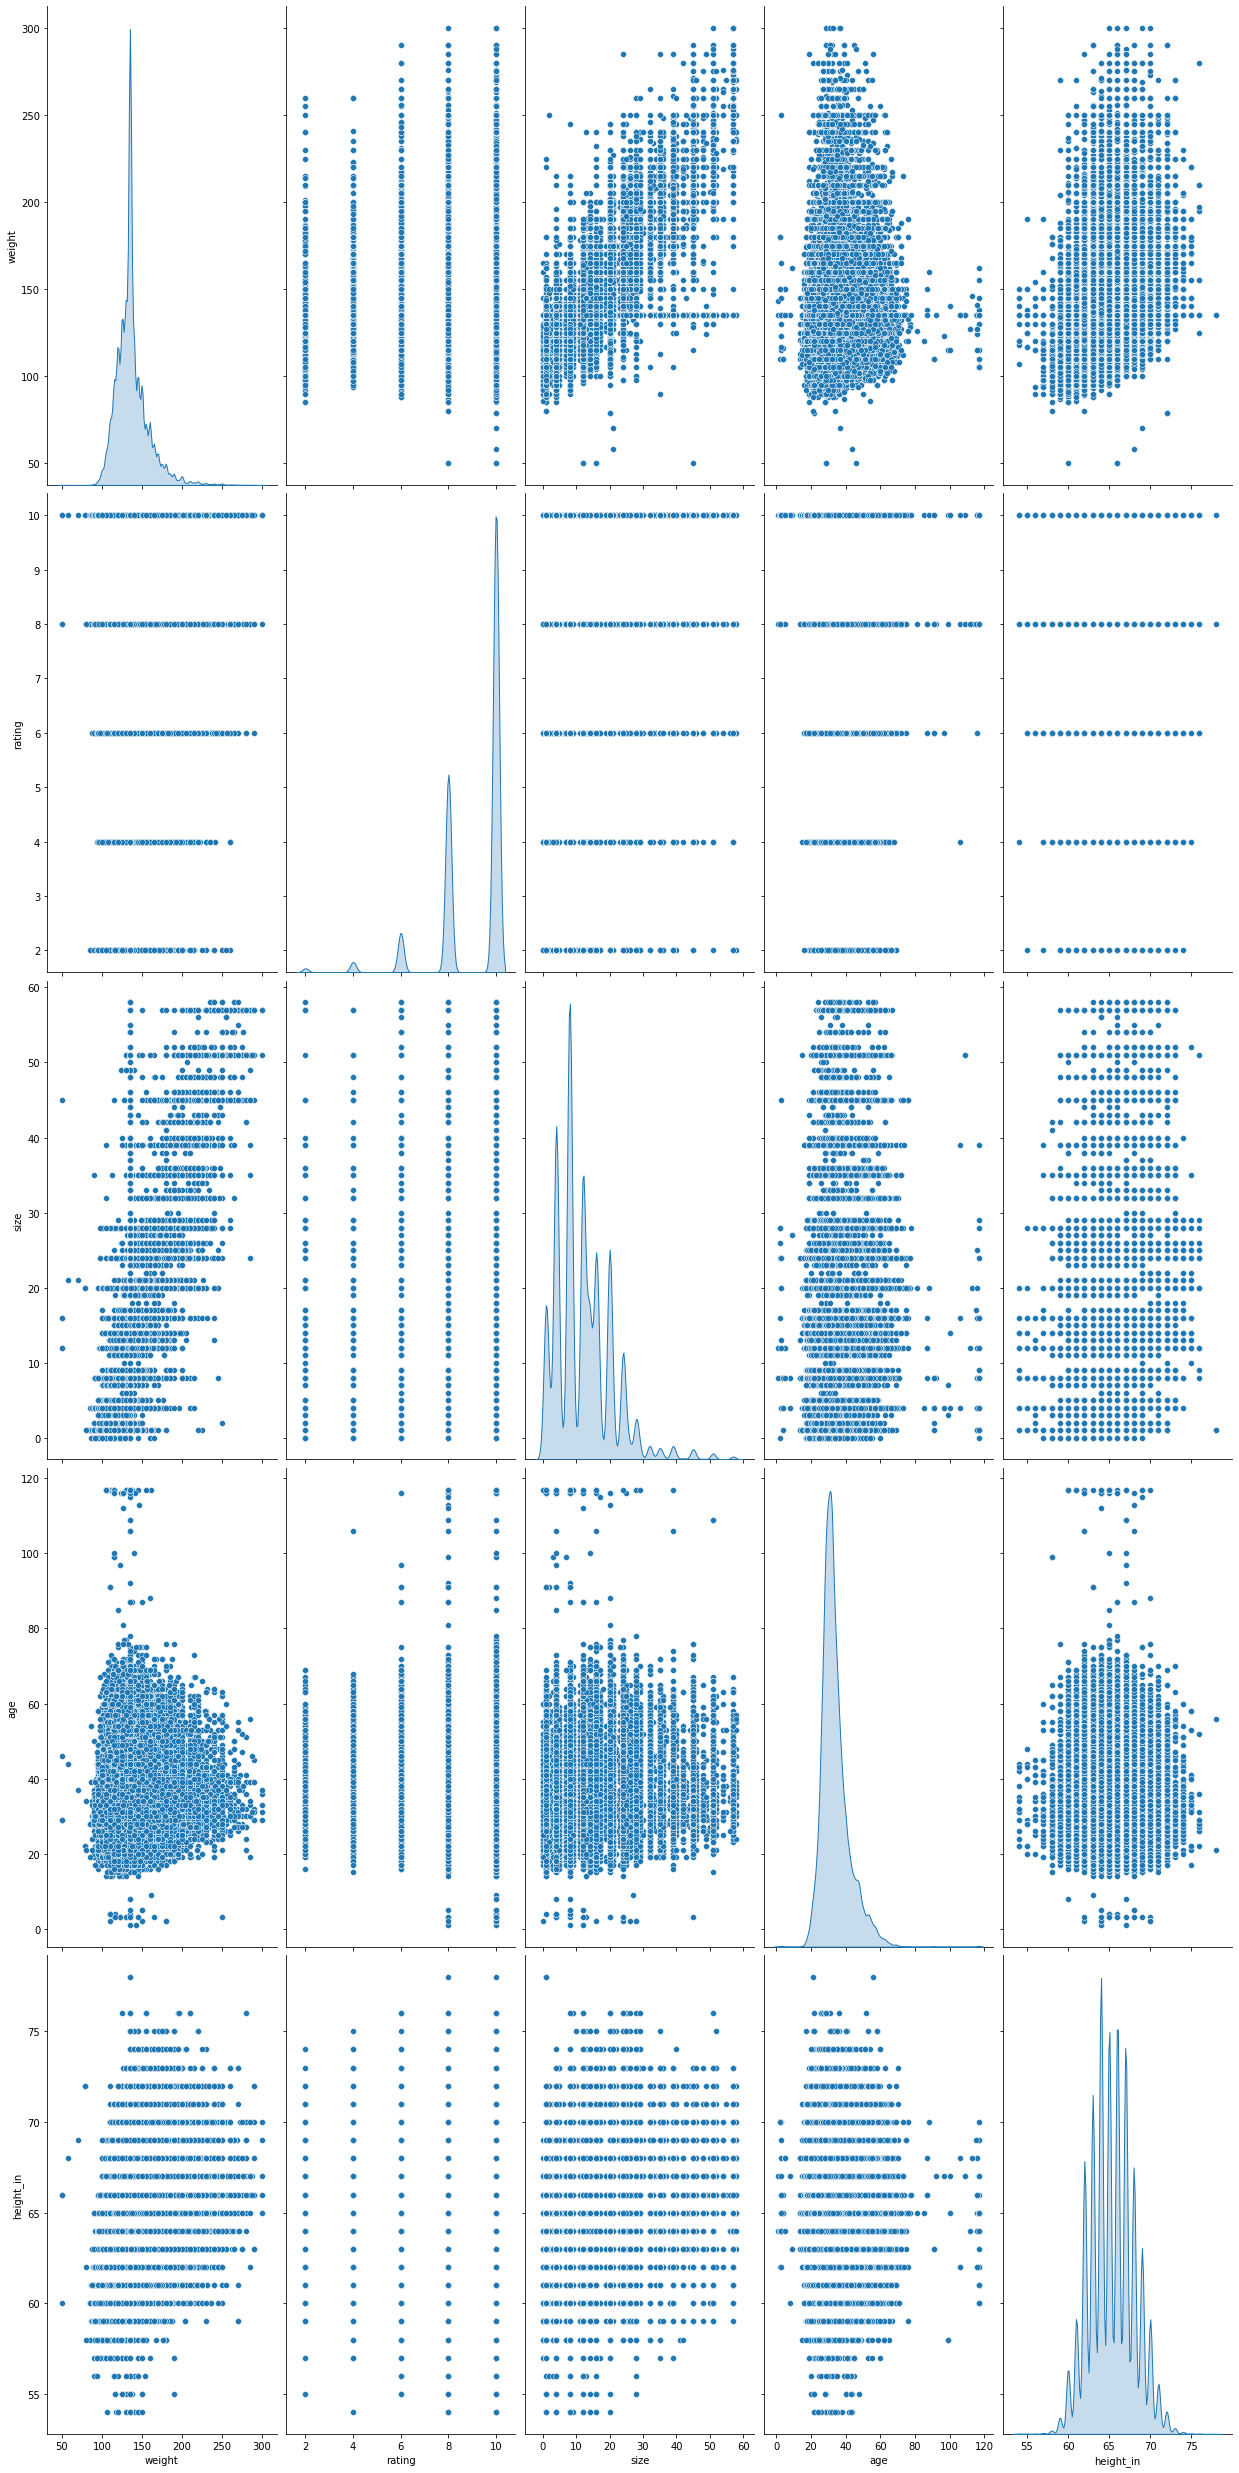

In [34]:
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')

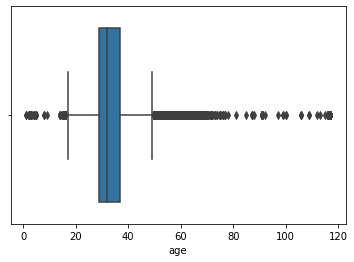

In [93]:
sns.boxplot(x='age', data=df)
plt.show()

In [94]:
present_outliers = []
# function for finding outliers
def outliers_via_zscore(input_data):
    threshold = 3
    mean = np.mean(input_data)
    std = np.std(input_data)
    for value in input_data:
        z_score = (value - mean) / std
        if (np.abs(z_score) > threshold):
            present_outliers.append(value)
    return present_outliers

outliers = outliers_via_zscore(df['age'])
outliers.sort()
print(f" Outliers via z-score : {outliers}")

 Outliers via z-score : [1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 8.0, 8.0, 9.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 5

In [95]:
len(outliers)

2750

In [96]:
df['age'] = pd.DataFrame(np.where(df['age']>=100,100,df['age']))
df['age'] = pd.DataFrame(np.where(df['age']<=20,20,df['age']))

In [97]:
df['age'].value_counts()

31.0    14482
32.0    14450
30.0    14095
29.0    13554
28.0    11932
        ...  
92.0        1
81.0        1
78.0        1
97.0        1
88.0        1
Name: age, Length: 68, dtype: int64

In [98]:
df.isnull().sum() #checking for null values after applying capping

fit             0
bust size       0
weight          0
rating          0
rented for      0
body type       0
category        0
size            0
age           378
height_in       0
dtype: int64

In [99]:
df.dropna(inplace=True) #dropping null values from dataset

In [100]:
df.describe()

,weight,rating,size,age,height_in
count,191977.000000,191977.000000,191977.000000,191977.000000,191977.000000
mean,137.018757,9.092558,12.244857,33.872797,65.309126
std,20.140987,1.430132,8.494557,7.948806,2.659215
min,50.000000,2.000000,0.000000,20.000000,54.000000
25%,125.000000,8.000000,8.000000,29.000000,63.000000
50%,135.000000,10.000000,12.000000,32.000000,65.000000
75%,145.000000,10.000000,16.000000,37.000000,67.000000
max,300.000000,10.000000,58.000000,100.000000,78.000000


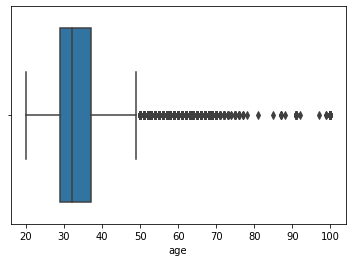

In [101]:
sns.boxplot(x='age', data=df)
plt.show()

In [102]:
df_clean = df.copy()

In [103]:
df_cat = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [104]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in
0,0,39,137.0,10.0,5,3,44,14,28.0,68.0
1,0,37,132.0,10.0,3,6,20,12,36.0,66.0
2,0,37,135.0,10.0,4,3,45,4,100.0,64.0
3,0,38,135.0,8.0,2,4,16,8,34.0,65.0
4,0,37,145.0,10.0,6,1,20,12,27.0,69.0


In [105]:
mm = MinMaxScaler()
df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df1 = df.copy()   #create a copy of cleaned, encoded and standardized dataset to use

In [106]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in
0,0.0,0.371429,0.348,1.00,0.714286,0.500000,0.656716,0.241379,0.1000,0.583333
1,0.0,0.352381,0.328,1.00,0.428571,1.000000,0.298507,0.206897,0.2000,0.500000
2,0.0,0.352381,0.340,1.00,0.571429,0.500000,0.671642,0.068966,1.0000,0.416667
3,0.0,0.361905,0.340,0.75,0.285714,0.666667,0.238806,0.137931,0.1750,0.458333
4,0.0,0.352381,0.380,1.00,0.857143,0.166667,0.298507,0.206897,0.0875,0.625000


In [107]:
## Calculating covariance matrix
cov_matrix = np.cov(df1.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.26730745e-01  3.45701617e-04  3.89168782e-04 -1.55972778e-02
   8.78647447e-04 -7.07071132e-04  1.44511855e-05  3.40946354e-03
   6.36517736e-06  1.02680451e-05]
 [ 3.45701617e-04  1.08867149e-02  4.78083550e-03 -3.93676333e-04
  -5.98882983e-05 -5.91196654e-03 -2.18508806e-04  9.58697159e-03
   1.80617663e-05  1.70272658e-03]
 [ 3.89168782e-04  4.78083550e-03  6.49054977e-03 -3.00611278e-04
   2.31081613e-04 -4.95890557e-03 -2.22493614e-04  8.53408158e-03
  -5.40456696e-06  3.11676011e-03]
 [-1.55972778e-02 -3.93676333e-04 -3.00611278e-04  3.19574727e-02
   6.63820980e-04  2.22987872e-04 -8.05529964e-04 -9.61954298e-04
   3.94145499e-06  3.50561318e-05]
 [ 8.78647447e-04 -5.98882983e-05  2.31081613e-04  6.63820980e-04
   8.65633768e-02 -7.05120242e-04 -3.23050298e-03  2.13246115e-04
  -1.13119513e-04 -5.60041470e-04]
 [-7.07071132e-04 -5.91196654e-03 -4.95890557e-03  2.22987872e-04
  -7.05120242e-04  6.87849796e-02 -9.52804142e-05 -8.23620220e-03
  -1.61594215

In [108]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 9.86372904e-01  1.67817418e-02  2.68987622e-02 -1.74759433e-02
   1.51875250e-01  4.98825308e-02 -6.45514246e-03  1.18206672e-02
   4.70726138e-03  3.55003012e-05]
 [ 7.48815180e-03 -4.14554557e-03 -1.35147782e-01 -1.88243794e-02
  -2.04955510e-01  3.73968722e-01  1.22881911e-01  8.62686285e-01
  -1.99880529e-01 -1.29722493e-02]
 [ 7.08464778e-03 -6.67436181e-03 -1.12228989e-01 -1.62226437e-02
  -1.65721909e-01  3.06774913e-01 -9.27436387e-01 -4.49869446e-02
   5.75014895e-02 -1.90895814e-03]
 [-1.58226924e-01 -1.73682657e-02  2.67122060e-03 -1.02822742e-01
   8.64703490e-01  4.65036425e-01 -9.93002555e-04  1.01676251e-03
  -1.04539743e-02 -7.90802506e-04]
 [ 1.82056546e-02 -9.96583749e-01  4.54436407e-02  6.53225778e-02
  -9.03483067e-03  1.28913478e-04  2.65776153e-03  2.80222406e-03
   7.59467299e-03  1.72657636e-03]
 [-1.85389823e-02  4.42075191e-02  9.57894638e-01 -9.23165200e-03
  -1.38168243e-01  2.45139217e-01 -9.95497086e-03  1.75549534e-02
   2.15295296e-0

In [109]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [31.447843908264772, 21.097795370068024, 17.558938058154837, 8.82596374473536, 7.20598594422744, 6.897992210009598, 2.738344922071002, 2.3989649137487206, 1.2552086071739166, 0.5729623215463178]
Cummulative Variance Explained:  [ 31.44784391  52.54563928  70.10457734  78.93054108  86.13652703
  93.03451924  95.77286416  98.17182907  99.42703768 100.        ]


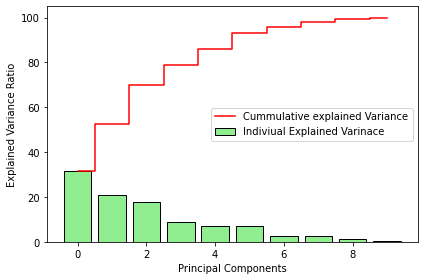

In [50]:
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### 90-95% of the data can be explained with 6 components

In [110]:
pca=PCA(n_components = 6)
pca.fit(df1)

PCA(n_components=6)

In [111]:
data_pca = pca.transform(df1)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.209133,-0.136583,0.009659,0.296640,-0.067217,0.110612
1,-0.225558,0.147586,-0.476618,-0.079278,-0.001126,0.151264
2,-0.218290,0.009046,-0.036037,0.309370,-0.150843,-0.042330
3,-0.184834,0.276022,-0.165377,-0.117140,0.147685,-0.098477
4,-0.201696,-0.316338,0.318520,-0.045905,-0.092242,-0.013112


In [54]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,73485.233454
1,2,51904.404378
2,3,42365.615418
3,4,37370.647020
4,5,34321.543722
5,6,32025.482266
6,7,29952.316792
7,8,28181.676986
8,9,26834.168545
9,10,25370.207499


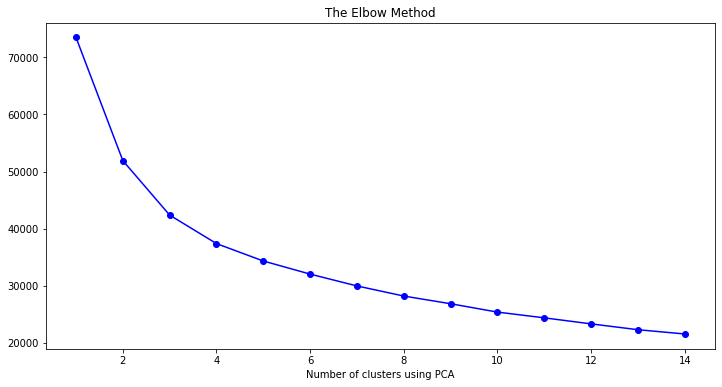

In [55]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

## Interpretation:
#### From the Elbow plot we can see that at K=3 the inertia starts to drop significantly. The clusters are labeled as 0,1,2.

In [112]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=42)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [113]:
## obtained labels from kmeans clustering
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 0])

In [114]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,2
1,1
2,2
3,1
4,2


In [115]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [117]:
## joining the label dataframe with pca applied dataframe

df_kmeans = data_pca.join(df_labels)

df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Labels
0,-0.209133,-0.136583,0.009659,0.296640,-0.067217,0.110612,2
1,-0.225558,0.147586,-0.476618,-0.079278,-0.001126,0.151264,1
2,-0.218290,0.009046,-0.036037,0.309370,-0.150843,-0.042330,2
3,-0.184834,0.276022,-0.165377,-0.117140,0.147685,-0.098477,1
4,-0.201696,-0.316338,0.318520,-0.045905,-0.092242,-0.013112,2


In [118]:
df_kmeans['Labels'].value_counts()

2    82498
1    65784
0    43695
Name: Labels, dtype: int64

In [57]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=100)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.33711512653576464
3 0.2455271755173943
4 0.2394764685473825
5 0.22645186329415212
6 0.2221031890655864
7 0.20785124330949756
8 0.21753734015591736
9 0.21452199340489198
10 0.2148708908424017
11 0.22601683626222568
12 0.21615074986652397
13 0.21819438259803675
14 0.22132980117685327


#### We chose 3 as the number of clusters from Elbow Plot, and after silhouette score we observe that 2 and 3 are the optimal number of clusters, though 2 seems to be optimal K value

# Agglomerative Clustering

In [119]:
df_ac = df.sample(frac = 0.05)   #due to low computational power, can only take 0.05% of dataset which amounts to ~10000 entries

df_ac.shape

(9599, 10)

In [120]:
df_ac.iloc[:,:] = mm.fit_transform(df_ac.iloc[:,:])
df_ac.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in
31913,0.5,0.525773,0.257426,0.75,0.857143,0.500000,0.287879,0.137931,0.125,0.500000
5173,0.0,0.515464,0.405941,1.00,0.857143,0.166667,0.227273,0.206897,0.125,0.444444
151179,0.0,0.360825,0.232673,0.75,0.857143,0.166667,0.227273,0.137931,0.525,0.555556
115646,0.0,0.381443,0.133663,1.00,0.571429,0.833333,0.666667,0.017241,0.225,0.333333
31231,1.0,0.268041,0.257426,1.00,0.428571,1.000000,0.666667,0.206897,0.175,0.222222


In [121]:
df_ac.reset_index(inplace=True,drop=True)
df_ac.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in
0,0.5,0.525773,0.257426,0.75,0.857143,0.500000,0.287879,0.137931,0.125,0.500000
1,0.0,0.515464,0.405941,1.00,0.857143,0.166667,0.227273,0.206897,0.125,0.444444
2,0.0,0.360825,0.232673,0.75,0.857143,0.166667,0.227273,0.137931,0.525,0.555556
3,0.0,0.381443,0.133663,1.00,0.571429,0.833333,0.666667,0.017241,0.225,0.333333
4,1.0,0.268041,0.257426,1.00,0.428571,1.000000,0.666667,0.206897,0.175,0.222222


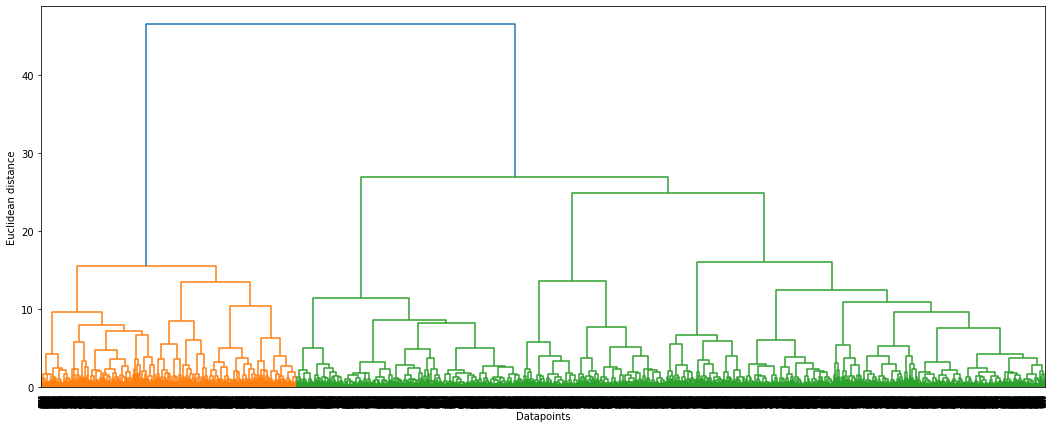

In [65]:
plt.figure(figsize=[18,7])
merg = linkage(df_ac, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

#### From the dendrogram we can confirm that 2 clusters is optimal as it is the largest distance observed vertically without crossing horizontal lines

In [122]:
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(df_ac)

In [123]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,0
3,0
4,1


In [125]:
df_hier = df_clean.join(df_label1)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,14,28.0,68.0,1.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,12,36.0,66.0,0.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,4,100.0,64.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,8,34.0,65.0,0.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,12,27.0,69.0,1.0


In [126]:
from sklearn.metrics import silhouette_score
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_ac)
    labels = hier.fit_predict(df_ac)
    print(i,silhouette_score(df_ac,labels))

2 0.30292652754195354
3 0.18103294212240448
4 0.15697001389149176
5 0.1747615739594888
6 0.17201784730368733
7 0.15602316653030093
8 0.1579622609692108
9 0.15598149736713807
10 0.14451841319370906
11 0.1436105932808192
12 0.14902598629007593
13 0.15518703536732276
14 0.13989307746045476


#### Silhouette score for 2 clusters is maximum

## Conclusion

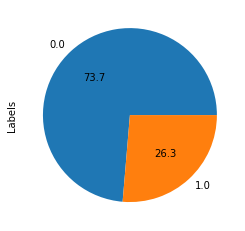

In [127]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

#### The clusters are unbalanced as there are more records for cluser 0 than for cluster 1 (almost 3 times as many)

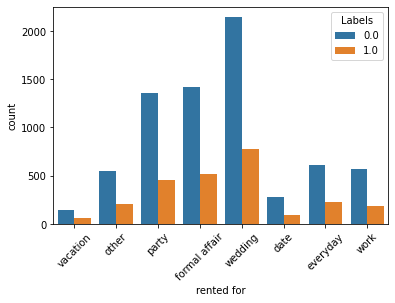

In [128]:
sns.countplot(df_hier['rented for'],hue='Labels',data=df_hier)
plt.xticks(rotation = 45)
plt.show()

#### More number of customers belong to Cluster 0 for all occasions, with the most being for weddings and then formal affairs and parties.

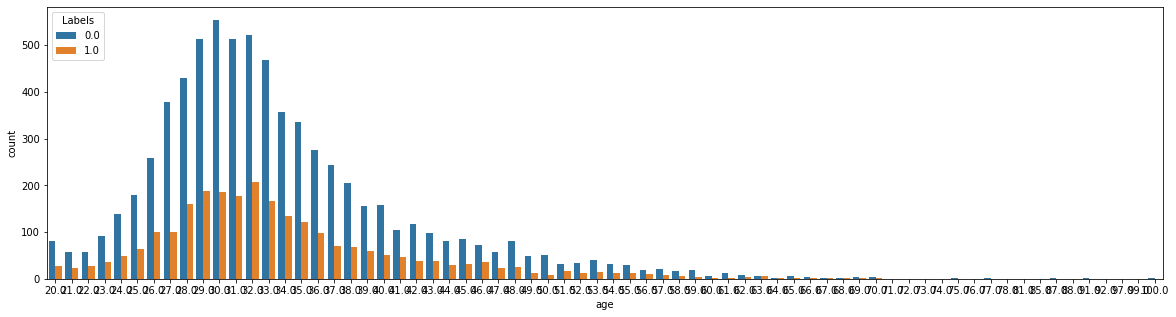

In [137]:
plt.figure(figsize=[20,5])
ax_grid = sns.countplot(x="age", hue="Labels", data=df_hier)
plt.show()

#### Distribution of age is same within both clusters, and there are more customers belonging to cluster 0

#### We applied PCA to the 'renttherunway' dataset and found that 6 out of 15 features could explain 90-95% of the data
#### We used the PCA transformed data and applied K-means clustering to it, for which we found 2/3 as the optimal value of K using elbow plot and silhouette score
#### To do agglomerative clustering we took a sample from the cleaned, encoded and standardized dataset and created a dendrogram to find optimal number of clusters to be 2, and built an agglomerative clustering model accordingly, then evaluated the model with silhouette score.
#### Due to the low number of features we can conclude that adding more features will allow better clustering of customers to understand their preferences. Data points like geographical information (rural or urban), educational background, most purchased/viewed items, average price of items bought, fashion choices, income and expenditure etc can help with better segmentation and hence target specific customers for higher turnover